In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_excel ("Indian states_population data_02-01-2021.xlsx", sheet_name='Covid numbers and health infra')
df.head()

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,Number of storage facilities,Capacity (MT)
0,2,Andaman and Nicobar Islands,3712,166,3494,52,3.0,810.0
1,1,Andhra Pradesh,646530,70357,570667,5506,330.0,1567664.0
2,3,Arunachal Pradesh,8133,2216,5903,14,2.0,6000.0
3,4,Assam,163491,30182,132712,597,39.0,178096.0
4,5,Bihar,172854,12958,159022,874,311.0,1479122.0


In [56]:
df.drop(['sl_no','Number of storage facilities','Capacity (MT)'],axis=1, inplace=True)
df.head()

,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases
0,Andaman and Nicobar Islands,3712,166,3494,52
1,Andhra Pradesh,646530,70357,570667,5506
2,Arunachal Pradesh,8133,2216,5903,14
3,Assam,163491,30182,132712,597
4,Bihar,172854,12958,159022,874


In [57]:
df.set_index('state_ut', inplace = True)
df.head()

,confirmed_cases,active_cases,recovered_cases,death_cases
state_ut,,,,
Andaman and Nicobar Islands,3712,166,3494,52
Andhra Pradesh,646530,70357,570667,5506
Arunachal Pradesh,8133,2216,5903,14
Assam,163491,30182,132712,597
Bihar,172854,12958,159022,874


In [58]:
df.isna().sum()

confirmed_cases    0
active_cases       0
recovered_cases    0
death_cases        0
dtype: int64

In [59]:
# Data Normalization
df_normal = normalize(df)
df_normal = pd.DataFrame(df_normal, columns=df.columns, index=df.index)
df_normal.head()

,confirmed_cases,active_cases,recovered_cases,death_cases
state_ut,,,,
Andaman and Nicobar Islands,0.727742,0.032544,0.685003,0.010195
Andhra Pradesh,0.747225,0.081315,0.659547,0.006364
Arunachal Pradesh,0.790312,0.215337,0.573615,0.001360
Assam,0.768546,0.141881,0.623858,0.002806
Bihar,0.734816,0.055086,0.676015,0.003715


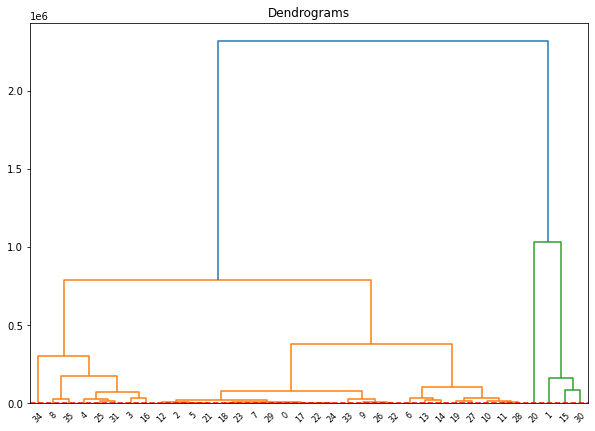

In [60]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=.30, color='r', linestyle='--')

In [61]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
c=cluster.fit_predict(df)

In [62]:
c

array([0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 1, 1], dtype=int64)

In [63]:
# Elbow method just for checking number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

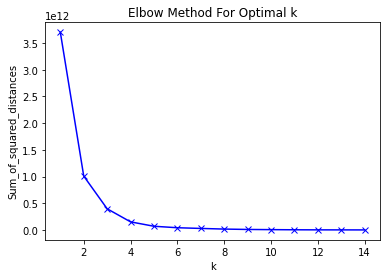

In [64]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
data = pd.read_excel ("Indian states_population data_02-01-2021.xlsx", sheet_name='Covid numbers and health infra')

In [66]:
data['class'] = c

In [67]:
data

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,Number of storage facilities,Capacity (MT),class
0,2,Andaman and Nicobar Islands,3712,166,3494,52,3.0,810.0,0
1,1,Andhra Pradesh,646530,70357,570667,5506,330.0,1567664.0,3
2,3,Arunachal Pradesh,8133,2216,5903,14,2.0,6000.0,0
3,4,Assam,163491,30182,132712,597,39.0,178096.0,1
4,5,Bihar,172854,12958,159022,874,311.0,1479122.0,1
5,6,Chandigarh,10726,2537,8049,140,7.0,12462.0,0
6,7,Chhattisgarh,93351,35850,56773,728,99.0,487292.0,0
7,8,Dadra and Nagar Haveli and Daman and Diu,2962,205,2755,2,97.0,129857.0,0
8,10,Delhi,256789,30836,220866,5087,29.0,7705.0,1
9,11,Goa,29879,5646,23857,376,969.0,3822112.0,0


In [68]:
data[data['class']==0]

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,Number of storage facilities,Capacity (MT),class
0,2,Andaman and Nicobar Islands,3712,166,3494,52,3.0,810.0,0
2,3,Arunachal Pradesh,8133,2216,5903,14,2.0,6000.0,0
5,6,Chandigarh,10726,2537,8049,140,7.0,12462.0,0
6,7,Chhattisgarh,93351,35850,56773,728,99.0,487292.0,0
7,8,Dadra and Nagar Haveli and Daman and Diu,2962,205,2755,2,97.0,129857.0,0
9,11,Goa,29879,5646,23857,376,969.0,3822112.0,0
10,12,Gujarat,127379,16438,107574,3367,359.0,819809.0,0
11,13,Haryana,116856,19276,96347,1233,76.0,146769.0,0
12,14,Himachal Pradesh,13049,3950,8959,140,69.0,250169.0,0
13,15,Jammu and Kashmir,67510,19918,46530,1062,58.0,236680.0,0


In [69]:
data[data['class']==1]

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,Number of storage facilities,Capacity (MT),class
3,4,Assam,163491,30182,132712,597,39.0,178096.0,1
4,5,Bihar,172854,12958,159022,874,311.0,1479122.0,1
8,10,Delhi,256789,30836,220866,5087,29.0,7705.0,1
16,18,Kerala,148132,42858,104682,592,1.0,15.0,1
25,27,Odisha,192548,34547,157265,736,697.0,2315096.0,1
31,34,Telengana,179246,30037,148139,1070,2406.0,14714235.0,1
34,36,Uttar Pradesh,369686,61698,302689,5299,NaN,NaN,1
35,37,West Bengal,234673,25101,205028,4544,NaN,NaN,1


In [70]:
data[data['class']==2]

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,Number of storage facilities,Capacity (MT),class
20,22,Maharashtra,1263799,273883,956030,33886,4.0,8200.0,2


In [71]:
data[data['class']==3]

,sl_no,state_ut,confirmed_cases,active_cases,recovered_cases,death_cases,Number of storage facilities,Capacity (MT),class
1,1,Andhra Pradesh,646530,70357,570667,5506,330.0,1567664.0,3
15,17,Karnataka,540847,94671,437910,8266,199.0,81705.0,3
30,32,Tamil Nadu,557999,46249,502740,9010,14.0,46354.0,3


In [72]:
data.to_excel("state_class.xlsx")

In [73]:
df_population = pd.read_excel ("Indian states_population data_02-01-2021.xlsx", sheet_name='% population - illness & char')

In [74]:
df_population.head()

,Sl.No.,India/States/UTs,Percentage of diabetic women,Percentage of asthmatic women,Percentage of Women with Goitre or Thyroid Disorder,Percentage of Women with heart disease,Percentage of women who have Cancer,Percentage of diabetic men,Percentage of asthmatic men,Percentage of Men with Goitre or thyroid disorder,...,Women - Slightly above normal systolic and diastolic pressure (%),Men - Slightly above normal systolic and diastolic pressure (%),Women - Moderately high systolic or diastolic pressure (%),Men - Moderately high systolic or diastolic pressure (%),Women - Very high systolic and/or diastolic pressure (%),Men - Very high systolic and/or diastolic pressure (%),Women (15-49) who use any kind of tobacco (%),Men (15-49) who use any kind of tobacco (%),Women (15-49) who consume alcohol (%),Men (15-49) who consume alcohol (%)
0,1,Andhra Pradesh,2.4,3.0,3.8,1.4,0.1,3.2,1.6,0.6,...,7.6,11.0,1.7,3.6,0.7,1.6,5.0,46.0,0.9,46.0
1,2,Assam,1.0,0.9,1.7,1.3,0.1,1.1,0.7,0.3,...,11.7,15.0,3.0,3.1,1.3,1.5,23.2,72.4,7.5,37.8
2,3,Bihar,1.6,1.8,1.2,2.3,0.6,1.3,1.4,0.5,...,4.4,7.6,0.9,1.3,0.6,0.5,8.0,66.5,1.0,34.9
3,4,Chattisgarh,0.5,0.9,1.3,0.6,0.1,0.8,0.4,0.1,...,6.8,9.5,1.3,2.3,0.7,0.9,25.2,68.6,11.4,52.3
4,5,Gujarat,1.2,1.3,1.0,0.3,0.1,1.1,0.9,0.2,...,7.4,9.9,1.5,2.3,0.8,0.8,8.4,60.2,0.8,16.1


In [75]:
df_population.isna().sum()

Sl.No.                                                                             0
India/States/UTs                                                                   0
Percentage of diabetic women                                                       0
Percentage of asthmatic women                                                      0
Percentage of Women with Goitre or Thyroid Disorder                                0
Percentage of Women with heart disease                                             0
Percentage of women who have Cancer                                                0
Percentage of diabetic men                                                         0
Percentage of asthmatic men                                                        0
Percentage of Men with Goitre or thyroid disorder                                  0
Percentage of Men with heart disease                                               0
Percentage of Men who have Cancer                                

In [76]:
df_clean = df_population.dropna()
df_clean.head(25)

,Sl.No.,India/States/UTs,Percentage of diabetic women,Percentage of asthmatic women,Percentage of Women with Goitre or Thyroid Disorder,Percentage of Women with heart disease,Percentage of women who have Cancer,Percentage of diabetic men,Percentage of asthmatic men,Percentage of Men with Goitre or thyroid disorder,...,Women - Slightly above normal systolic and diastolic pressure (%),Men - Slightly above normal systolic and diastolic pressure (%),Women - Moderately high systolic or diastolic pressure (%),Men - Moderately high systolic or diastolic pressure (%),Women - Very high systolic and/or diastolic pressure (%),Men - Very high systolic and/or diastolic pressure (%),Women (15-49) who use any kind of tobacco (%),Men (15-49) who use any kind of tobacco (%),Women (15-49) who consume alcohol (%),Men (15-49) who consume alcohol (%)
0,1,Andhra Pradesh,2.4,3.0,3.8,1.4,0.1,3.2,1.6,0.6,...,7.6,11.0,1.7,3.6,0.7,1.6,5.0,46.0,0.9,46.0
1,2,Assam,1.0,0.9,1.7,1.3,0.1,1.1,0.7,0.3,...,11.7,15.0,3.0,3.1,1.3,1.5,23.2,72.4,7.5,37.8
2,3,Bihar,1.6,1.8,1.2,2.3,0.6,1.3,1.4,0.5,...,4.4,7.6,0.9,1.3,0.6,0.5,8.0,66.5,1.0,34.9
3,4,Chattisgarh,0.5,0.9,1.3,0.6,0.1,0.8,0.4,0.1,...,6.8,9.5,1.3,2.3,0.7,0.9,25.2,68.6,11.4,52.3
4,5,Gujarat,1.2,1.3,1.0,0.3,0.1,1.1,0.9,0.2,...,7.4,9.9,1.5,2.3,0.8,0.8,8.4,60.2,0.8,16.1
5,6,Haryana,1.1,1.4,2.2,1.1,0.2,0.5,0.3,0.5,...,7.6,14.4,1.1,1.8,0.5,0.6,3.3,46.3,0.1,27.7
6,7,Jharkhand,0.7,0.7,1.1,0.7,0.0,2.1,1.4,0.7,...,5.9,9.3,1.2,2.0,0.7,0.9,11.6,61.7,9.9,38.9
7,8,Karnataka,2.6,1.5,1.8,0.8,0.3,2.6,0.7,0.3,...,7.1,12.0,1.9,2.2,0.7,1.2,4.8,44.7,1.2,28.3
8,9,Kerala,4.3,3.1,8.1,1.3,0.2,4.3,1.0,0.5,...,5.5,7.5,0.8,1.3,0.5,0.7,1.8,43.5,0.7,45.2
9,10,Madhya Pradesh,1.2,1.9,1.5,1.8,0.2,0.9,1.1,0.5,...,6.1,8.2,1.2,2.0,0.6,0.7,16.0,68.5,2.1,30.8


In [77]:
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,left_index=False, right_index=False, sort=True)
# pd.merge(left,right,on=['id','subject_id'])
merge_df=df_clean.merge(data[['state_ut','class']], right_on = ['state_ut'], left_on= ['India/States/UTs'], how='inner')

In [78]:
merge_df.head()

,Sl.No.,India/States/UTs,Percentage of diabetic women,Percentage of asthmatic women,Percentage of Women with Goitre or Thyroid Disorder,Percentage of Women with heart disease,Percentage of women who have Cancer,Percentage of diabetic men,Percentage of asthmatic men,Percentage of Men with Goitre or thyroid disorder,...,Women - Moderately high systolic or diastolic pressure (%),Men - Moderately high systolic or diastolic pressure (%),Women - Very high systolic and/or diastolic pressure (%),Men - Very high systolic and/or diastolic pressure (%),Women (15-49) who use any kind of tobacco (%),Men (15-49) who use any kind of tobacco (%),Women (15-49) who consume alcohol (%),Men (15-49) who consume alcohol (%),state_ut,class
0,1,Andhra Pradesh,2.4,3.0,3.8,1.4,0.1,3.2,1.6,0.6,...,1.7,3.6,0.7,1.6,5.0,46.0,0.9,46.0,Andhra Pradesh,3
1,2,Assam,1.0,0.9,1.7,1.3,0.1,1.1,0.7,0.3,...,3.0,3.1,1.3,1.5,23.2,72.4,7.5,37.8,Assam,1
2,3,Bihar,1.6,1.8,1.2,2.3,0.6,1.3,1.4,0.5,...,0.9,1.3,0.6,0.5,8.0,66.5,1.0,34.9,Bihar,1
3,5,Gujarat,1.2,1.3,1.0,0.3,0.1,1.1,0.9,0.2,...,1.5,2.3,0.8,0.8,8.4,60.2,0.8,16.1,Gujarat,0
4,6,Haryana,1.1,1.4,2.2,1.1,0.2,0.5,0.3,0.5,...,1.1,1.8,0.5,0.6,3.3,46.3,0.1,27.7,Haryana,0


In [79]:
merge_df=merge_df.drop(columns=['Sl.No.','India/States/UTs','state_ut'])

In [80]:
# Data For Classification analysis
X= merge_df.drop(['class'], axis = 1) 
y= merge_df['class']

In [81]:
# Data Normalization
df_normal = normalize(X)
X = pd.DataFrame(df_normal, columns=X.columns, index=X.index)
X.head()

,Percentage of diabetic women,Percentage of asthmatic women,Percentage of Women with Goitre or Thyroid Disorder,Percentage of Women with heart disease,Percentage of women who have Cancer,Percentage of diabetic men,Percentage of asthmatic men,Percentage of Men with Goitre or thyroid disorder,Percentage of Men with heart disease,Percentage of Men who have Cancer,...,Women - Slightly above normal systolic and diastolic pressure (%),Men - Slightly above normal systolic and diastolic pressure (%),Women - Moderately high systolic or diastolic pressure (%),Men - Moderately high systolic or diastolic pressure (%),Women - Very high systolic and/or diastolic pressure (%),Men - Very high systolic and/or diastolic pressure (%),Women (15-49) who use any kind of tobacco (%),Men (15-49) who use any kind of tobacco (%),Women (15-49) who consume alcohol (%),Men (15-49) who consume alcohol (%)
0,0.006782,0.008477,0.010738,0.003956,0.000283,0.009042,0.004521,0.001695,0.003956,0.000565,...,0.021475,0.031082,0.004804,0.010172,0.001978,0.004521,0.014128,0.129980,0.002543,0.129980
1,0.002278,0.002050,0.003872,0.002961,0.000228,0.002506,0.001594,0.000683,0.001822,0.000000,...,0.026650,0.034166,0.006833,0.007061,0.002961,0.003417,0.052844,0.164909,0.017083,0.086099
2,0.001783,0.002006,0.001337,0.002563,0.000669,0.001449,0.001560,0.000557,0.001672,0.000111,...,0.004904,0.008470,0.001003,0.001449,0.000669,0.000557,0.008916,0.074112,0.001114,0.038895
3,0.003668,0.003973,0.003056,0.000917,0.000306,0.003362,0.002751,0.000611,0.001528,0.000306,...,0.022617,0.030258,0.004585,0.007030,0.002445,0.002445,0.025674,0.183995,0.002445,0.049208
4,0.002143,0.002728,0.004286,0.002143,0.000390,0.000974,0.000585,0.000974,0.000974,0.000195,...,0.014807,0.028056,0.002143,0.003507,0.000974,0.001169,0.006430,0.090209,0.000195,0.053969


In [82]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model and assign it to object "random_forest"
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X, y)

RandomForestClassifier(random_state=0)

In [83]:
random_forest.score(X, y)

1.0

In [84]:
# Find out the important features
# The code below allows us to sort  X feature variables in order of importance:
importances = pd.DataFrame({'feature':X.columns,'importance': random_forest.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Households using clean fuel for cooking (%),0.060098
Percentage of diabetic men,0.049710
Percentage of asthmatic men,0.045210
Households using improved sanitation facility (%),0.044836
Overweight or obese women (15-49) (BMI >= 25.0 kg/m2) (%),0.042681
Percentage of diabetic women,0.042322
Children under age 5 years (%),0.041031
Percentage of women who have Cancer,0.039749
Population density (per sq. km),0.038099


In [43]:
importances.to_excel("feature_importance.xlsx")